In [83]:
import scipy.io as io
import matplotlib.pyplot as plt
import numpy as np
data = io.loadmat('data/solar.mat')
X_org_1 = data['data']

## Data Preprocessing and De-mean
We apply simple data preprocessing and demean techniques here

In [90]:
nnormal = 200
dX = np.diff(X_org_1,n=1,axis=-1)
mdX = np.mean(dX[:,:,:nnormal],axis=-1)
X1 = dX - mdX[:,:,np.newaxis]
X2 = X1/np.std(X1)
X = np.rollaxis(X2,2,0)
X_org = np.rollaxis(X_org_1, 2,0)
nt,nx,ny = X.shape

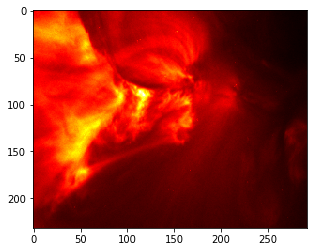

In [86]:
fig = plt.figure()
isample = 0
ims = []
for t in range(nt):
    im = plt.imshow(X_org[t],cmap=plt.get_cmap('hot'))
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50,blit=True,repeat_delay=1000)
ani.save('solar_original.mp4')

## Data Visualization

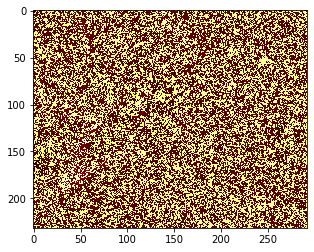

In [91]:
import matplotlib.animation as animation
fig = plt.figure()
isample = 0
ims = []
for t in range(299):
    im = plt.imshow(X[t],cmap=plt.get_cmap('hot'))
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50,blit=True,repeat_delay=1000)
ani.save('solar_demean.mp4')


In [92]:
from IPython.display import Video
Video("solar_original.mp4")

In [93]:
from IPython.display import Video
Video("solar_demean.mp4")

## Apply the algorithms with B-spline Basis
We need to specify the basis. One commonly used basis is the Bspline basis. 
One important equation is to use
${\displaystyle \left(\mathbf {B} ^{\textsf {T}}\otimes \mathbf {A} \right)\,\operatorname {vec} (\mathbf {X} )=\operatorname {vec} (\mathbf {AXB} )=\operatorname {vec} (\mathbf {C} ).}$

In [125]:
from Bspline import bsplineBasis
k0 = 10
degree = 1 # Overlap region? (Size of B-spline basis) 
Bx = bsplineBasis(nx,k0-degree+1,degree)
By = bsplineBasis(ny,k0-degree+1,degree)
M = np.kron(Bx,By)

### Lets look at what basis look like
There two methods of computing 
1. Use Matrix computaiton (Recommended)
2. Use kronecker product (Slow but easy to derive)

Method 1: Use Matrix computation

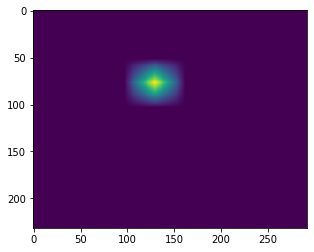

In [126]:
Theta = np.zeros((k0,k0))
Theta[3,4] = 1
Ytmp = Bx@Theta@By.T
plt.imshow(Ytmp)

Method 2: Use kronecker product

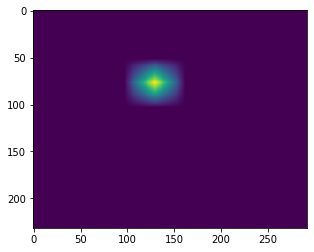

In [127]:
theta = np.zeros(k0**2)
theta[3*k0+4] = 1
Ytmp = M@theta
plt.imshow(Ytmp.reshape((nx,ny)))